In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import random
%matplotlib inline

class NoBRException(Exception):
    pass

def get_util(utils, is_p1, my_act, their_act):
    if is_p1:
        return utils[(my_act, their_act)][0]
    else:
        return utils[(their_act, my_act)][1]
    

def best_response(actions, utils, model_other_player, is_p1):
    br = None
    highest_util = -100000
    total_n_turns = sum(model_other_player.values())
    
    for my_act in actions:
        util = 0
        for their_act in actions:
            util += (model_other_player[their_act] / total_n_turns) * get_util(utils, is_p1, my_act, their_act)
        if util > highest_util:
            highest_util = util
            br = my_act
        elif util == highest_util:
            if random.random() > .5:
                highest_util = util
                br = my_act
    if br is None:
        raise NoBRException()
    return br

Text(0.5, 1.0, 'Change in Probability of Action H over time for P2')

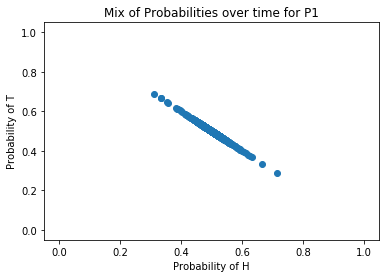

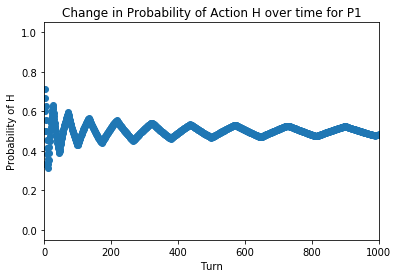

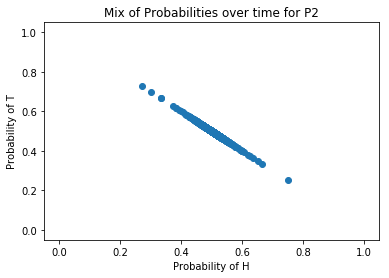

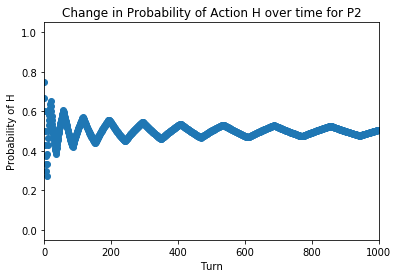

In [36]:
n_turns = 1000
game = "PEN"#"BOS"

if game == "BOS": #Battle of the sexes
    actions = ['D','C']
    utils = {('D','D'):(0,0), ('D','C'):(3,2), ('C','D'):(2,3), ('C','C'):(0,0)}
    model_of_p2 = {'D':0, 'C':1} 
    model_of_p1 = {'D':1, 'C':0}
elif game == "RPS": #Rock paper scissors
    actions = ['R','P','S']
    utils = {('R','R'):(0,0), ('R','P'):(-1,1), ('R','S'):(1,-1), 
            ('P','R'):(1,-1), ('P','P'):(0,0), ('P','S'):(-1,1),
            ('S','R'):(-1,1), ('S','P'):(1,-1), ('S','S'):(0,0)}
    model_of_p2 = {'R':1, 'P':0, 'S':0} 
    model_of_p1 = {'R':0, 'P':1, 'S':0}
elif game == "PEN": #Matching pennies
    actions = ['H','T']
    utils = {('H','H'):(1,-1), ('H','T'):(-1,1), ('T','H'):(-1,1), ('T','T'):(1,-1)}
    model_of_p2 = {'H':1, 'T':1} 
    model_of_p1 = {'H':1, 'T':1}

p1_turns = np.zeros((n_turns, 2))
p2_turns = np.zeros((n_turns, 2))
axis0 = actions[0]
axis1 = actions[1]
for i in range(n_turns):
    p1_act = best_response(actions, utils, model_of_p2, True)
    p2_act = best_response(actions, utils, model_of_p1, False)
    model_of_p2[p2_act] += 1
    model_of_p1[p1_act] += 1
    p1_turns[i,0] = model_of_p1[axis0] / sum(model_of_p1.values())
    p1_turns[i,1] = model_of_p1[axis1] / sum(model_of_p1.values())
    p2_turns[i,0] = model_of_p2[axis0] / sum(model_of_p2.values())
    p2_turns[i,1] = model_of_p2[axis1] / sum(model_of_p2.values())

plt.figure()
plt.scatter(p1_turns[:,0], p1_turns[:,1])
plt.xlim((-.05,1.05))
plt.ylim((-.05,1.05))
plt.xlabel("Probability of " + axis0)
plt.ylabel("Probability of " + axis1)
plt.title("Mix of Probabilities over time for P1")

plt.figure()
plt.scatter(range(n_turns), p1_turns[:,0])
plt.xlim((0,n_turns))
plt.ylim((-.05,1.05))
plt.xlabel("Turn")
plt.ylabel("Probability of " + axis0)
plt.title("Change in Probability of Action " + axis0 + " over time for P1")

plt.figure()
plt.scatter(p2_turns[:,0], p2_turns[:,1])
plt.xlim((-.05,1.05))
plt.ylim((-.05,1.05))
plt.xlabel("Probability of " + axis0)
plt.ylabel("Probability of " + axis1)
plt.title("Mix of Probabilities over time for P2")

plt.figure()
plt.scatter(range(n_turns), p2_turns[:,0])
plt.xlim((0,n_turns))
plt.ylim((-.05,1.05))
plt.xlabel("Turn")
plt.ylabel("Probability of " + axis0)
plt.title("Change in Probability of Action " + axis0 + " over time for P2")




